In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

## Wczytanie danych

In [2]:
calendar = pd.read_csv("calendar.txt", encoding='cp1251', sep='\t')
calendar.head()

,DATE,ISO,datenum,DOW,dowint,Year,Month,dom,monthstr,doy,...,numholidays,holidayname,holidaytype,national,minor,christian,jewish,muslim,chinese,other
0,1950-01-01 00:00:00,1950-01-01,18264,Sun,1,1950,1,1,Jan,1,...,1,New Year's Day,national,New Year's Day,NaN,NaN,NaN,NaN,NaN,NaN
1,1950-01-02 00:00:00,1950-01-02,18265,Mon,2,1950,1,2,Jan,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1950-01-03 00:00:00,1950-01-03,18266,Tue,3,1950,1,3,Jan,3,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950-01-04 00:00:00,1950-01-04,18267,Wed,4,1950,1,4,Jan,4,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1950-01-05 00:00:00,1950-01-05,18268,Thu,5,1950,1,5,Jan,5,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
campaigns = pd.read_csv("campaigns.txt", encoding='cp1251', sep='\t')
campaigns.head()

,campaignid,campaignname,channel,discount,freeshippingflag
0,2001,NaN,PARTNER,0,N
1,2002,NaN,AD,0,N
2,2003,NaN,PARTNER,0,N
3,2004,NaN,PARTNER,0,N
4,2005,NaN,PARTNER,0,N


In [4]:
customers = pd.read_csv("customers.txt", encoding='cp1251', sep='\t')
customers.head()

,customerid,householdid,gender,firstname
0,174596,53949999,M,DANIEL
1,68239,49927024,M,JIM
2,10203,20914414,F,DONNA
3,174288,53957047,F,DIONE
4,68099,49927024,M,JIM


In [5]:
orderlines = pd.read_csv("orderlines.txt", encoding='cp1251', sep='\t')
orderlines.head()

,orderlineid,orderid,productid,shipdate,billdate,unitprice,numunits,totalprice
0,1010561,1006414,10834,2011-03-07 00:00:00,2011-03-08 00:00:00,18.00,1,18.00
1,1010562,1006541,11052,2011-01-19 00:00:00,2011-01-20 00:00:00,10.00,2,20.00
2,1010563,1006542,11070,2011-01-19 00:00:00,2011-01-20 00:00:00,19.12,1,19.12
3,1010564,1010154,11196,2009-11-19 00:00:00,2009-11-20 00:00:00,14.95,1,14.95
4,1010565,1009110,11048,2009-11-11 00:00:00,2009-11-12 00:00:00,10.00,2,20.00


In [6]:
orders = pd.read_csv("orders.txt", encoding='cp1251', sep='\t')
orders.head()

,orderid,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits
0,1002854,45978,2141,2009-10-13 00:00:00,NEWTON,MA,02459,VI,190.00,3,3
1,1002855,125381,2173,2009-10-13 00:00:00,NEW ROCHELLE,NY,10804,VI,10.00,1,1
2,1002856,103122,2141,2011-06-02 00:00:00,MIAMI,FL,33137,AE,35.22,2,2
3,1002857,130980,2173,2009-10-14 00:00:00,E RUTHERFORD,NJ,07073,AE,10.00,1,1
4,1002886,48553,2141,2010-11-19 00:00:00,BALTIMORE,MD,21218,VI,10.00,1,1


In [7]:
products = pd.read_csv("products.txt", encoding='cp1251', sep='\t')
products.head()

,PRODUCTID,PRODUCTNAME,PRODUCTGROUPCODE,PRODUCTGROUPNAME,INSTOCKFLAG,FULLPRICE
0,10001,NaN,CA,CALENDAR,N,15
1,10002,NaN,CA,CALENDAR,N,10
2,10003,NaN,CA,CALENDAR,N,10
3,10004,NaN,BK,BOOK,Y,90
4,10005,NaN,BK,BOOK,Y,16


In [8]:
subscribers = pd.read_csv("subscribers.txt", encoding='cp1251', sep='\t')
subscribers.head()

,customer_id,rate_plan,monthly_fee,market,channel,start_date,stop_date,stop_type,tenure,censored
0,2,Top,150.0,Gotham,Dealer,2001-09-16,NaN,NaN,1929.0,1
1,52,Bottom,25.0,Metropolis,Mail,1997-01-13,2004-12-17,V,2895.0,0
2,76,Bottom,25.0,Gotham,Dealer,2000-12-08,2004-10-23,V,1415.0,0
3,89,Bottom,25.0,Gotham,Dealer,1999-09-16,2004-03-18,V,1645.0,0
4,217,Bottom,40.0,Gotham,Dealer,2000-09-04,2004-11-25,I,1543.0,0


In [10]:
zipCensus = pd.read_csv("zipCensus.txt", encoding='cp1251', sep='\t')
zipCensus.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5,7,9,368,369,371,373,375,377,379,620) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,36,11937,"Springs, NY",Suffolk NY,1.0000,36103,\N,1.0000.1,Unnamed: 8,0,...,1417.1,0.9590,60,0.0410.1,"$1,868.00",$0.00,960,0.6500,1289,0.8730
0,36,11941,"Eastport, NY",Suffolk NY,1.0000,36103,\N,1.0000,NaN,0,...,149,0.9140,14,0.0860,"$1,210.00",$0.00,92,0.5640,149,0.9140
1,36,11940,"East Moriches, NY",Suffolk NY,1.0000,36103,\N,1.0000,NaN,0,...,479,0.9760,12,0.0240,"$1,694.00",$0.00,206,0.4200,479,0.9760
2,36,12435,"Greenfield Park, NY",Ulster NY,1.0000,36111,\N,1.0000,NaN,0,...,0,0.0000,19,1.0000,$0.00,$0.00,0,0.0000,0,0.0000
3,36,12062,"East Nassau, NY",Rensselaer NY,0.9040,36083,36021,1.0000,NaN,0,...,136,0.9190,12,0.0810,$795.00,$874.00,22,0.1490,93,0.6280
4,36,11942,"East Quogue, NY",Suffolk NY,1.0000,36103,\N,1.0000,NaN,0,...,74,1.0000,0,0.0000,"$1,979.00",$0.00,31,0.4190,68,0.9190


In [11]:
zipCensus_ss = pd.read_csv("zipCensus_ss.txt", encoding='cp1251', sep='\t')
zipCensus_ss.head()

,state,zcta5,ZIPName,County,pctcnty,Fipco,FipCo2,pctState,AltZIPs,NaltZIPs,...,CashRenter,pctCashRenter,NoCashRenter,pctNoCashRenter,MedianGrossRent,AvgGrossRent,CashRenterOver30Pct,pctCashRenterOver30Pct,CashRenterOver750,pctCashRenterOver750
0,36,11937,Springs NY,Suffolk NY,1.0,36103.0,NaN,1.0,NaN,0.0,...,1417,0.959,60,0.041,1868,0,960,0.650,1289,0.873
1,36,11941,Eastport NY,Suffolk NY,1.0,36103.0,NaN,1.0,NaN,0.0,...,149,0.914,14,0.086,1210,0,92,0.564,149,0.914
2,36,11940,East Moriches NY,Suffolk NY,1.0,36103.0,NaN,1.0,NaN,0.0,...,479,0.976,12,0.024,1694,0,206,0.420,479,0.976
3,36,12435,Greenfield Park NY,Ulster NY,1.0,36111.0,NaN,1.0,NaN,0.0,...,0,0.000,19,1.000,0,0,0,0.000,0,0.000
4,36,12063,East Schodack NY,Rensselaer NY,1.0,36083.0,NaN,1.0,NaN,0.0,...,19,1.000,0,0.000,986,0,11,0.579,19,1.000


In [12]:
zipcounty = pd.read_csv("zipcounty.txt", encoding='cp1251', sep='\t')
zipcounty.head()

,zipcode,latitude,longitude,poname,zipclass,countyfips,state,countyname,countypop,countyhu,countylandareamiles,countywaterareamiles
0,773,18.366028,-65.708138,LUQUILLO,,72089,PR,Luquillo Municipio,19817,9327,25.697733,20.725328
1,775,18.323736,-65.296471,CULEBRA,P,72049,PR,Culebra Municipio,1868,1024,11.618370,157.207930
2,777,18.206490,-65.901772,JUNCOS,,72077,PR,Juncos Municipio,36452,13064,26.586044,0.012102
3,778,18.259092,-65.974640,GURABO,,72063,PR,Gurabo Municipio,36743,12854,27.841166,0.437728
4,780,18.001995,-66.607430,COTO LAUREL,,72113,PR,Ponce Municipio,186475,66471,114.721200,78.884560


## Część 1 - Analiza zamówień
# Rankingi zamówień pod różnymi kątami
# Top 10 stanów ze względu na liczbę zamówień

In [13]:
notNullStateOrders = orders[((orders.state).notnull())]
sortedOrdersByState = notNullStateOrders.sort_values(by=['state'])
sortedOrdersByState['state'].value_counts().head(10)

NY    53537
NJ    21274
CA    17839
FL    10185
CT     9369
PA     7079
MA     6942
TX     6247
IL     5812
VA     4174
Name: state, dtype: int64

# Top 10 stanów jeśli chodzi o przychód z zamówień

In [14]:
def wartosci_zamowien():
    stany = []
    wartosc_zamowien = []
    stany_unikalne = orders.state.unique()
    for stan in stany_unikalne:
        wartosc_zamowien.append(np.dot(orders[orders.state==stan]['totalprice'] , orders[orders.state==stan]['numunits']))
        stany.append(stan)
        wartosc_zamowien_dla_stanu=pd.DataFrame()
        wartosc_zamowien_dla_stanu['state']=stany
        wartosc_zamowien_dla_stanu['revenue']=wartosc_zamowien
        wartosc_zamowien_dla_stanu['revenue']=wartosc_zamowien_dla_stanu['revenue'].apply(lambda x:x/1000000)
        wartosc_zamowien_dla_stanu.columns=['stan','wartosc zamowien w mln $']
        wartosc_zamowien_dla_stanu=wartosc_zamowien_dla_stanu.sort_values(by='wartosc zamowien w mln $',ascending=False)
    return wartosc_zamowien_dla_stanu

In [15]:
top10Revenues = wartosci_zamowien().head(10)
top10Revenues

,stan,wartosc zamowien w mln $
1,NY,28.613587
3,NJ,12.498457
14,CA,3.558843
45,AL,2.822930
5,CT,1.593636
2,FL,1.590996
8,IL,1.243718
0,MA,1.152272
9,TX,1.105806
7,PA,0.941745


# Wykres kołowy pokazujący wartości zamówień dla 10 stanów w %

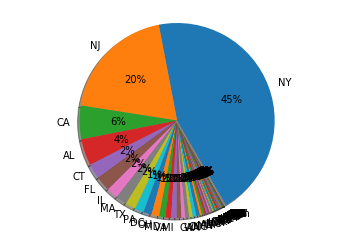

In [18]:
# Dane do wykresu
labels = wartosci_zamowien()['stan']
values = wartosci_zamowien()['wartosc zamowien w mln $']
 
# Wykres
plt.pie(values, labels=labels,
        autopct='%1.0f%%', shadow=True, startangle=300)
 
plt.axis('equal')
plt.show()